# Stage 15 - Orchestration & System Design
Complete the sections below. Keep your answers concise and focused on orchestration readiness.

## 1) Project Task Decomposition
List 4–8 tasks. Add more rows as needed.

In [1]:
from pathlib import Path
import pandas as pd
tasks = pd.DataFrame({
    'task': [
        'ingest', 
        'clean', 
        'train',
        'save', 
        'report'
    ],
    'inputs': [
        '../data/raw.csv', 
        'raw.csv', 
        'clean.csv', 
        'trained.pkl', 
        'trained.pkl, clean.csv'
    ],
    'outputs': [
        'raw.csv', 
        'clean.csv', 
        'trained.pkl', 
        'flask_api_running.txt', 
        'report.md'
    ],
    'idempotent': [True, True, True, True, True]
})
tasks

,task,inputs,outputs,idempotent
0,ingest,../data/raw.csv,raw.csv,True
1,clean,raw.csv,clean.csv,True
2,train,clean.csv,trained.pkl,True
3,save,trained.pkl,flask_api_running.txt,True
4,report,"trained.pkl, clean.csv",report.md,True


## 2) Dependencies (DAG)
Describe dependencies and paste a small diagram if you have one.

In [2]:
dag = {
    'ingest': [],
    'clean': ['ingest'],
    'train': ['clean'],
    'save': ['train'], 
    'report': ['clean', 'save']
}
dag

{'ingest': [],
 'clean': ['ingest'],
 'train': ['clean'],
 'save': ['train'],
 'report': ['clean', 'save']}

'DAG.png'

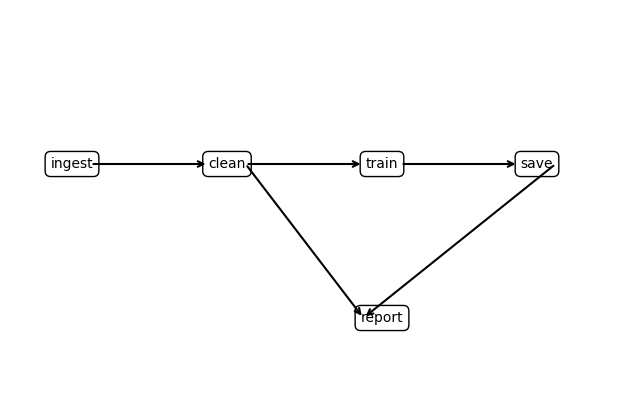

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))

positions = {
    "ingest": (0.1, 0.6),
    "clean": (0.35, 0.6),
    "train": (0.6, 0.6),
    "save":  (0.85, 0.6),
    "report":(0.6, 0.2),
}

for name, (x, y) in positions.items():
    ax.text(x, y, name, ha="center", va="center",
            bbox=dict(boxstyle="round,pad=0.4", fc="w", ec="k"))

def arrow(frm, to):
    x1, y1 = positions[frm]
    x2, y2 = positions[to]
    ax.annotate("", xy=(x2-0.03, y2), xytext=(x1+0.03, y1),
                arrowprops=dict(arrowstyle="->", lw=1.5))

arrow("ingest", "clean")
arrow("clean", "train")
arrow("train", "save")
arrow("clean", "report")
arrow("save", "report")

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")

out_path = "DAG.png"
plt.savefig(out_path, bbox_inches="tight")
out_path

## 3) Logging & Checkpoints Plan
Specify what you will log and where you will checkpoint for each task.

In [9]:
logging_plan = pd.DataFrame({
    'task': ['ingest', 'clean', 'train', 'save', 'report'],
    'log_messages': [
        'start/end, rows, source URI',
        'start/end, rows in/out',
        'params, metrics',
        'artifact path', 
        'generate report'
    ],
    'checkpoint_artifact': [
        'prices_raw.csv',
        'prices_clean.csv',
        'trained_model.pkl',
        'flask_api_running.txt', 
        'report.md'
    ]
})
logging_plan

,task,log_messages,checkpoint_artifact
0,ingest,"start/end, rows, source URI",prices_raw.csv
1,clean,"start/end, rows in/out",prices_clean.csv
2,train,"params, metrics",trained_model.pkl
3,save,artifact path,flask_api_running.txt
4,report,generate report,report.md


## 4) Right-Sizing Automation
Which parts will you automate now? Which stay manual? Why?

I will automate on repetitive tasks such as data munging, feature computation, model training, and deployment. 

Manual work is for tasks that requires human decision, interpretation. Manual tasks ensurs that automation could improve efficiency without replacing critical human decision-making.

## 5) (Stretch) Refactor One Task into a Function + CLI
Use the templates below.

In [10]:
import argparse, json, logging, sys
from datetime import datetime

def my_task(input_path: str, output_path: str) -> None:
    '''Example task template: read → transform → write JSON.'''
    logging.info('[my_task] start')
    # TODO: implement your logic
    result = {'run_at': datetime.utcnow().isoformat(), 'note': 'replace with real output'}
    Path(output_path).parent.mkdir(parents=True, exist_ok=True)
    Path(output_path).write_text(json.dumps(result, indent=2))
    logging.info('[my_task] wrote %s', output_path)

def main(argv=None):
    parser = argparse.ArgumentParser(description='Homework task wrapper')
    parser.add_argument('--input', required=True)
    parser.add_argument('--output', required=True)
    args = parser.parse_args(argv)
    logging.basicConfig(level=logging.INFO, handlers=[logging.StreamHandler(sys.stdout)])
    my_task(args.input, args.output)

if __name__ == '__main__':
    # Example simulated CLI in notebook:
    main(['--input', 'data/in.ext', '--output', 'data/out.json'])

INFO:root:[my_task] start
INFO:root:[my_task] wrote data/out.json


### Optional: Simple Retry Wrapper (fill in)
Add a small retry with linear backoff to harden a task.

In [11]:
import time
def retry(n_tries=3, delay=0.2):
    def wrapper(fn, *args, **kwargs):
        # TODO: implement try/except loop with sleep backoff
        return fn(*args, **kwargs)
    return wrapper